<h1 align="center"> 
DATS 6202, Spring 2018, Homework_2
</h1> 

<h1 align="center"> 
Due March 19, 11:59 PM
</h1> 

<h4 align="center"> 
Yuxiao Huang ([yuxiaohuang@gwu.edu](mailto:yuxiaohuang@gwu.edu))
</h4>

# Note
- Complete the missing parts indicated by **# Implement me**
- Submit an ipynb file named **Homework_2.ipynb** to [blackboard](https://blackboard.gwu.edu) folder /Assignments/Homework_2/
-  We expect you to follow a reasonable programming style. While we do not mandate a specific style, we require that your code to be neat, clear, **documented/commented** and above all consistent. **Marks will be deducted if these are not followed.**

# Overview
- Apply random forest classifier on [Iris dataset](https://archive.ics.uci.edu/ml/datasets/iris)
- Select features based on feature importance
- Evaluate the performance of the classifier on different selected features

# Step 1: load data
1. load Iris data
2. set df column name
3. get the features (X) and class (y)

In [106]:
import pandas as pd

In [107]:
# Load Iris data
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Class']
df.head()

,Sepal length,Sepal width,Petal length,Petal width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [108]:
# Get X and y
X = df.iloc[:, :-1].values

# Convert 2d array to 1d
y = df.iloc[:, -1:].values.ravel()#similar to flatten, but return the values itself





# Step 2: preprocess data
1. randomly choose 30% of the data for testing
2. encode the class
3. standaridize the features

In [109]:
from sklearn.model_selection import train_test_split

# Randomly choose 30% of the data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [110]:
from sklearn.preprocessing import LabelEncoder

# Encloding the class with sklearn's LabelEncoder
# Implement me
le= LabelEncoder()
y= le.fit_transform(y)

In [111]:
from sklearn.preprocessing import StandardScaler

# Standization with sklearn's StandardScaler
# Implement me
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

# Step 3:  get feature importance
1. train the random forest classifier
2. get the feature importances
3. plot the bar chart of importances (in descending order)

In [112]:
from sklearn.ensemble import RandomForestClassifier

# Random forest classifier
rfc = RandomForestClassifier(random_state=0)

# Train the model 
# Implement me
rfc.fit(X_train, y_train)

# Get the feature importances
# Implement me
importances = rfc.feature_importances_

In [113]:
# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
f_importances = pd.Series(importances, df.columns[:-1])

# Sort the array in descending order of the importances
f_importances.sort_values(ascending=False, inplace=True)

f_importances

Petal width     0.433986
Petal length    0.371770
Sepal length    0.159520
Sepal width     0.034725
dtype: float64

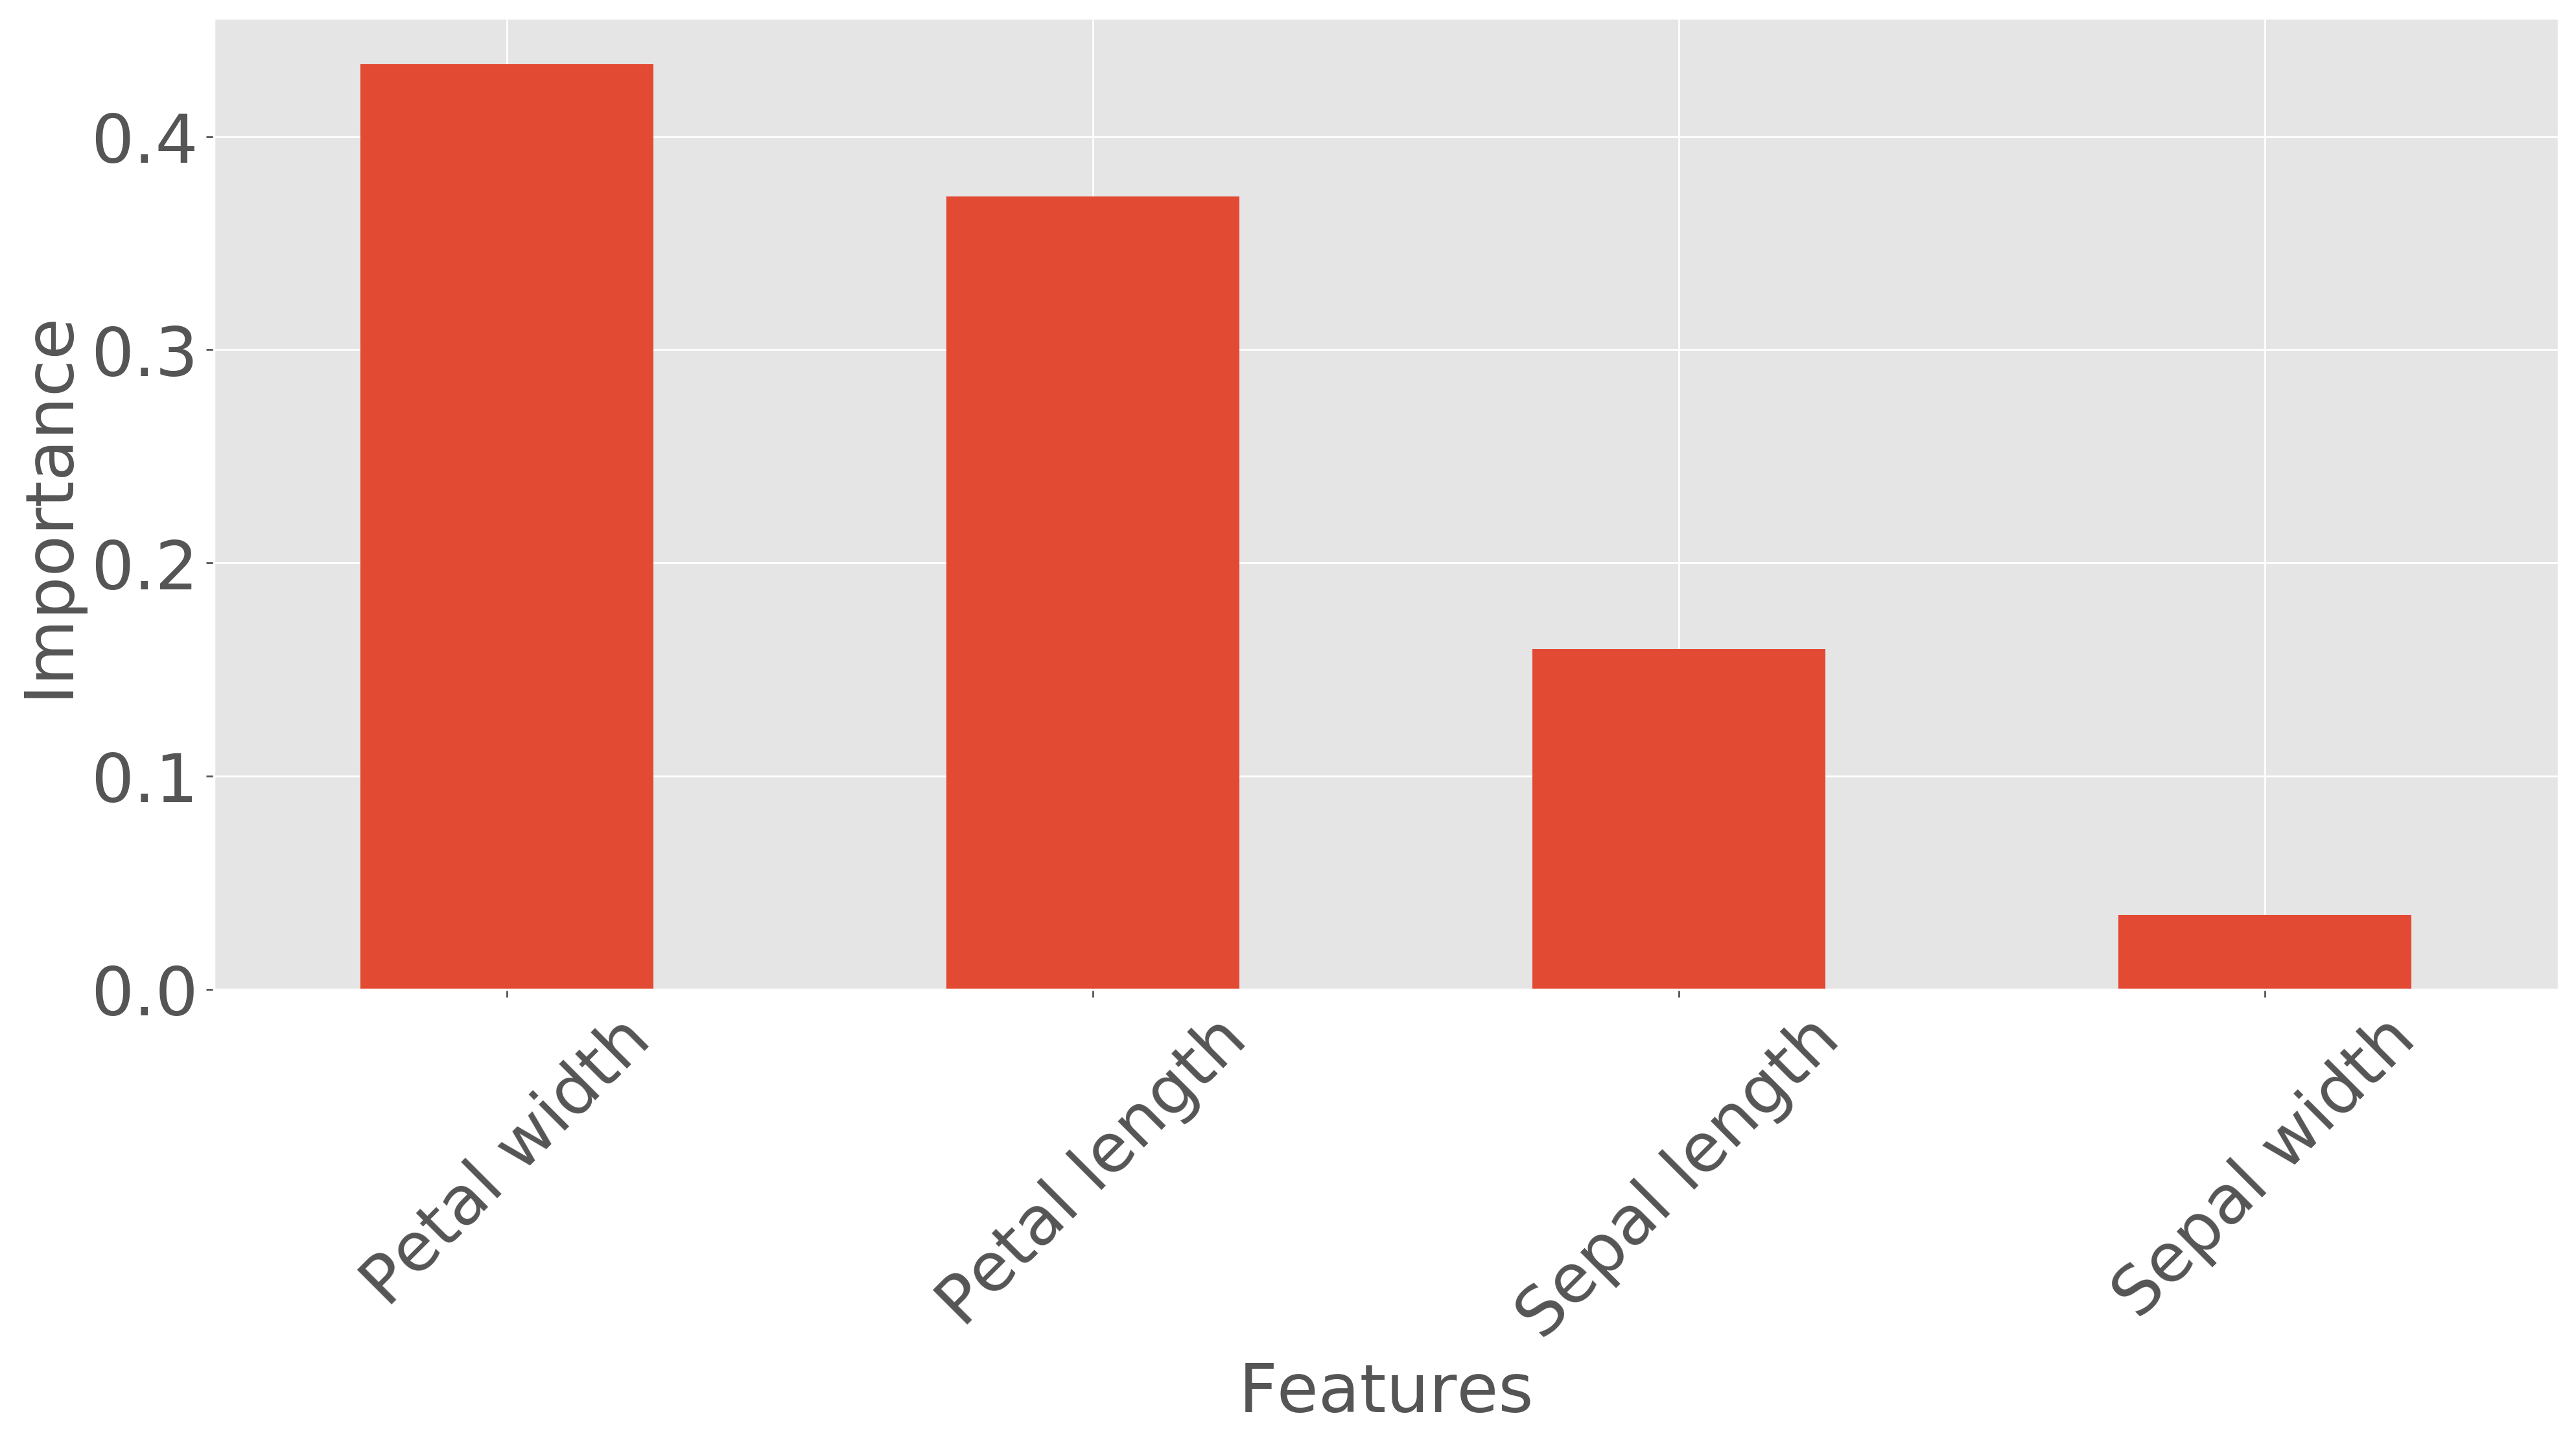

In [114]:
import matplotlib.pyplot as plt

# Make the bar Plot from f_importances 
plt.figure(figsize=(16,9),dpi=250)
f_importances.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=45, fontsize=30)
plt.xlabel('Features', fontsize=30)
plt.ylabel('Importance', fontsize=30)

# Show the plot
plt.tight_layout()
plt.show()

# Step 4:  select feature and evaluate performance
1. For $k$ from 1 to 4:
    1. select the top $k$ features in the figure above
    2. train and test the model based on the selected top $k$ features
    3. calculate the fscore on testing set 
2. Plot the fscores 

In [115]:
from sklearn.metrics import precision_recall_fscore_support

# Implement me
def model(k):
    fscores=[]
    for k in range(k):
   
        rfc.fit(X_train_std[:,:k+1], y_train)
        y_test_pred = rfc.predict(X_test_std[:,:k+1])
        precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_test_pred, average='micro')
        fscores.append(fscore)

    return fscores

# Hint:
# To obtain the same result, you must set **random_state=0** when using RandomForestClassifier classifer
# You may consider to use function **precision_recall_fscore_support( )** covered in Exercise_2 to calculate the fscore
    
# Note:
# Below are the top k seleced features and their corresponding scores
# This is for illustration purpose only
# You do not have to print this in your implementation

In [116]:
# Note:
# Below are the fscores of the top k seleced features
# This is for illustration purpose only
# You do not have to print this in your implementation
model(4)

[0.64444444444444449,
 0.75555555555555554,
 0.93333333333333335,
 0.97777777777777775]

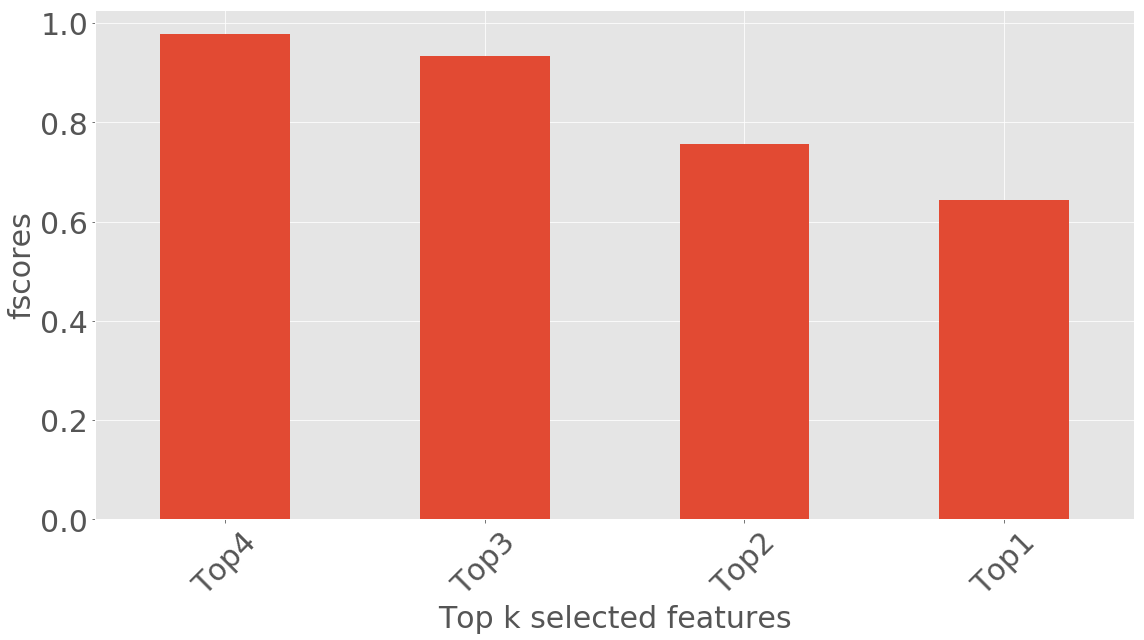

In [117]:
# Make the bar chart 
# Implement me
# Convert the fscores into one-dimensional 1darray with corresponding classifier names as axis labels
clf_fscores = pd.Series(model(4), ['Top1','Top2','Top3','Top4'])

# Sort the array in descending order of the fscores
clf_fscores.sort_values(ascending=False, inplace=True)

# Make the bar Plot from f_importances 
clf_fscores.plot(kind='bar', figsize=(16,9), rot=45, fontsize=30)

# Show the plot
plt.xlabel('Top k selected features', fontsize=30)
plt.ylabel('fscores', fontsize=30)
plt.tight_layout()
plt.show()


# Hint:
# You may consider to use code in [9] to plot the bar chart

# Reference:
1. Part of the code is from the "Python Machine Learning (2nd edition)" book code repository
2. Please find the reference to and website of the book below:
    - Raschka S. and Mirjalili V. (2017). Python Machine Learning. 2nd Edition.
    - https://sebastianraschka.com/books.html
3. Please find the website of the book code repository and info resource below:
    - https://github.com/rasbt/python-machine-learning-book-2nd-edition